In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

In [2]:
data = pd.read_csv('BigMart_Data.csv')

In [3]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Identifying the null values, if any

In [5]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [9]:
data['Item_Identifier'].nunique()

1559

In [ ]:
## Identifier column is more like S.no and it has least significance in predicting the Response Variable . So, dropping the column.

In [11]:
data.drop(columns = 'Item_Identifier',inplace = True)

In [12]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Filling the null value in Item_Weight by taking groupby mean value with Item_Type

In [13]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [42]:
data.groupby('Item_Type')['Item_Weight'].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [16]:
data['Item_Weight'] = data.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [17]:
data['Item_Weight'].isna().sum()

0

In [18]:
data.isna().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [20]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [22]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

## Filling Null Value in Outlet_Size by grouping Location_Type, Outlet_Type and finding Mode value

In [53]:
data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].agg(pd.Series.mode)

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store                  Small
                      Supermarket Type1    [Medium, Small]
Tier 2                Supermarket Type1              Small
Tier 3                Grocery Store                  Small
                      Supermarket Type1               High
                      Supermarket Type2             Medium
                      Supermarket Type3             Medium
Name: Outlet_Size, dtype: object

In [52]:
data['Outlet_Size'] = data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].transform(lambda x:x.fillna(x.agg(pd.Series.mode)))

In [55]:
data['Outlet_Size'].isna().sum()

0

In [56]:
data.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# Null Values are fixed with Group by Mean , Mode Values

## Renaming duplicate categories and aligning

In [57]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [58]:
data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular', 'low fat' : 'Low Fat'}, inplace = True)

In [59]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [62]:
data['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

## Fixing the year with Age calculation

In [64]:
data['Outlet_Age'] = 2023 - data['Outlet_Establishment_Year']

In [66]:
data.drop(columns = 'Outlet_Establishment_Year',inplace = True)

In [67]:
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,14
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,25
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,36
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,36
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,21
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,19
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,14


In [ ]:
#Dropping column Outlet_Identifier as it is more like serial no and is of no significance in predicting the Item_Outlet_Sales

In [70]:
data.drop(columns = 'Outlet_Identifier',inplace = True)

In [71]:
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,14
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,25
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,36
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,36
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Small,Tier 2,Supermarket Type1,549.2850,21
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,19
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,14


<Axes: >

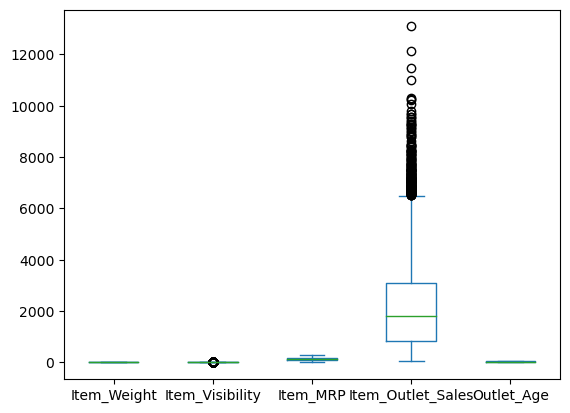

In [75]:
data.plot(kind = 'box')

<Axes: >

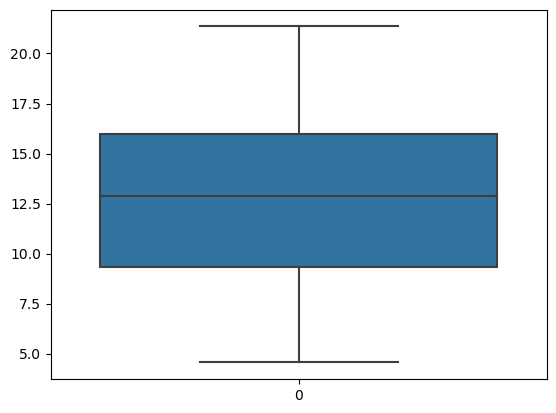

In [78]:
sns.boxplot(data['Item_Weight'])

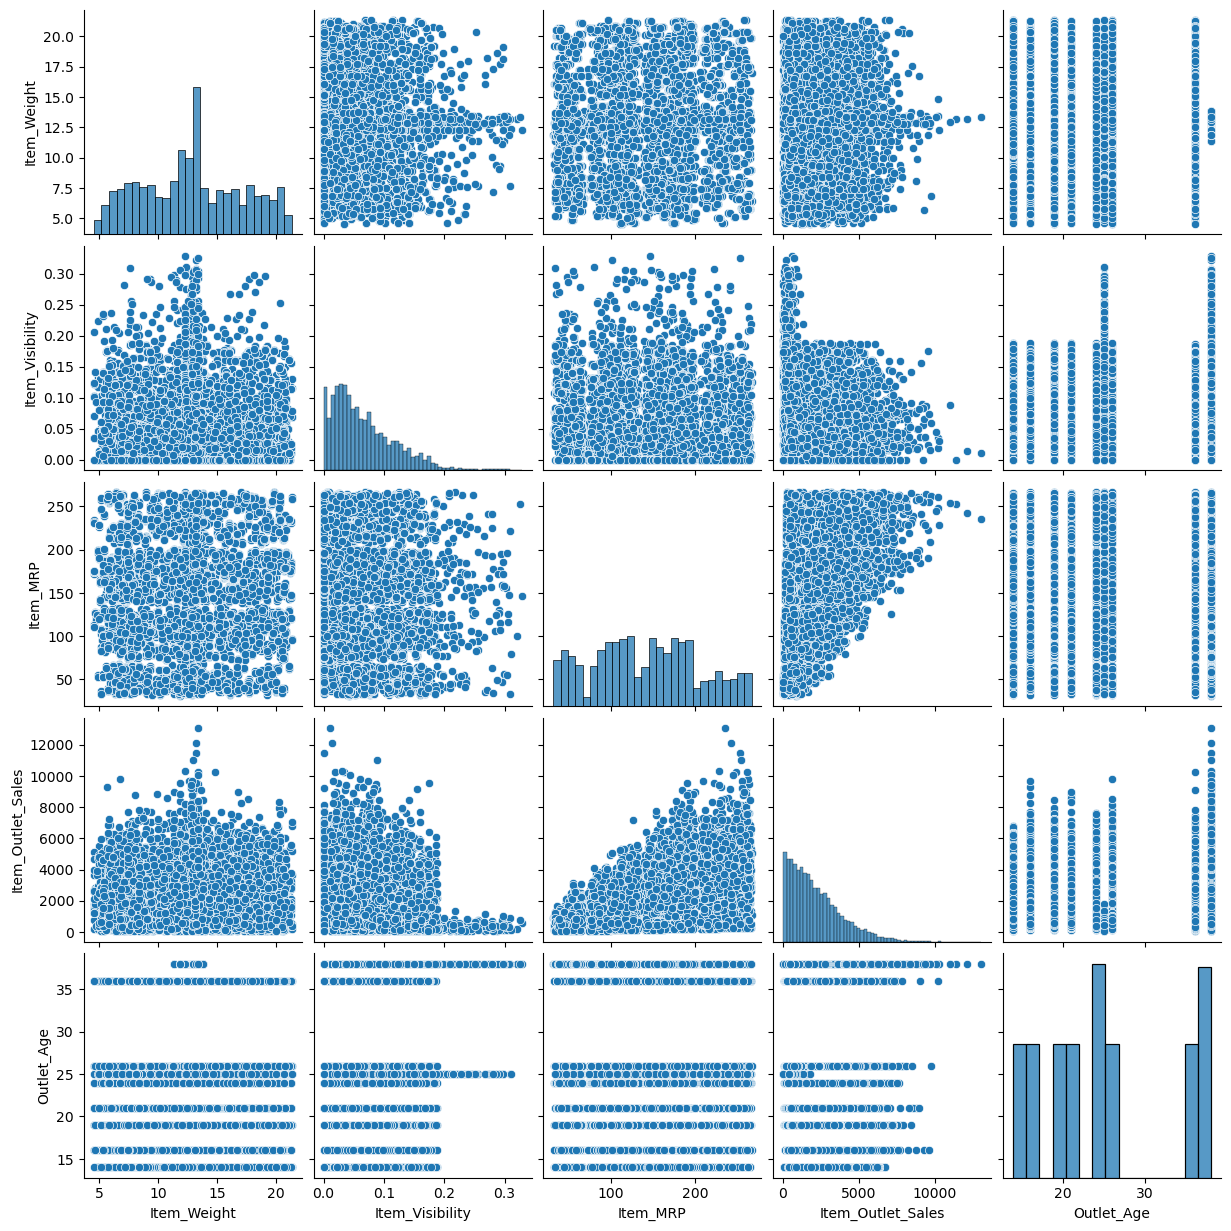

In [82]:
sns.pairplot(data)

## Correlation Analysis & Multicolinearity Check

In [80]:
data.corr()

C:\Users\janani.jayavel\AppData\Local\Temp\ipykernel_13136\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.011620,0.025821,0.012088,0.008376
Item_Visibility,-0.011620,1.000000,-0.001315,-0.128625,0.074834
Item_MRP,0.025821,-0.001315,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.012088,-0.128625,0.567574,1.000000,0.049135
Outlet_Age,0.008376,0.074834,-0.005020,0.049135,1.000000


C:\Users\janani.jayavel\AppData\Local\Temp\ipykernel_13136\3916738982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True)


<Axes: >

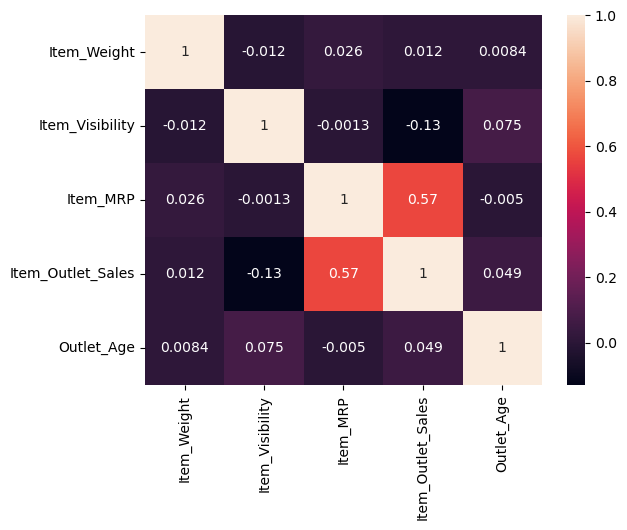

In [83]:
sns.heatmap(data.corr(),annot = True)

In [134]:
[variance_inflation_factor(data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']].values, i) for i in range(data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']].shape[1])]

[6.654694315142465, 2.53082395319355, 4.948879374443695, 6.71872414162334]

In [ ]:
# more than 5 is considered to be multicollinearity but these columns doesn't have casualty. so there is no multicollinearity

In [ ]:
"""Based on the correlation factor,heat map - 
Only Continuous feature that has higher correlation with Item_Outlet_Sales is "Item_MRP".
So, I am trying to predict a model with that one column. Just to practice Linear regression.
"""

# Simple Linear Regression For 1 Numerical Data

## Simple Linear Regression Modelling with Feature : Item_MRP 

In [103]:
x= data['Item_MRP']

In [104]:
y=data['Item_Outlet_Sales']

## Train and Test Data Spliting

In [109]:
train_x,test_x,train_y,test_y = train_test_split (x,y,test_size = 0.3,random_state = 3453)

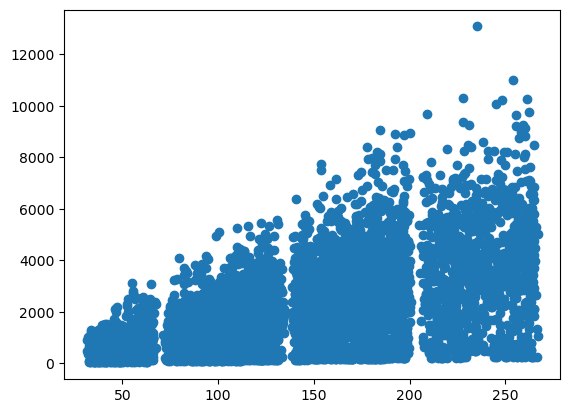

In [111]:
plt.scatter(train_x,train_y)
plt.show()

## Fitting and Training the Linear Regression Model

In [112]:
reg = LinearRegression()

In [114]:
reg.fit(train_x,train_y)

ValueError: Expected 2D array, got 1D array instead:
array=[190.953  147.6076  54.3956 ... 151.505  180.5976 234.03  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [115]:
train_x = train_x.reset_index().drop(columns = 'index')

In [116]:
train_y = train_y.reset_index().drop(columns = 'index')

In [117]:
reg.fit(train_x,train_y)

LinearRegression()

In [118]:
reg.intercept_

array([-52.39571627])

In [119]:
reg.coef_

array([[15.88969917]])

## Below is the model created for Item_MRP Feature

In [ ]:
# Item_Outlet_Sales = 15.8 * Item_MRP -52.3

## Predicting the Dependent Variable or Response Variable , Item_Outlet_Sales

In [120]:
train_predict = reg.predict(train_x)

In [121]:
train_predict

array([[2981.79000883],
       [2293.04464254],
       [ 811.93400375],
       ...,
       [2354.97315607],
       [2817.24581807],
       [3666.27057986]])

Text(0, 0.5, 'Item_Outlet_Sales')

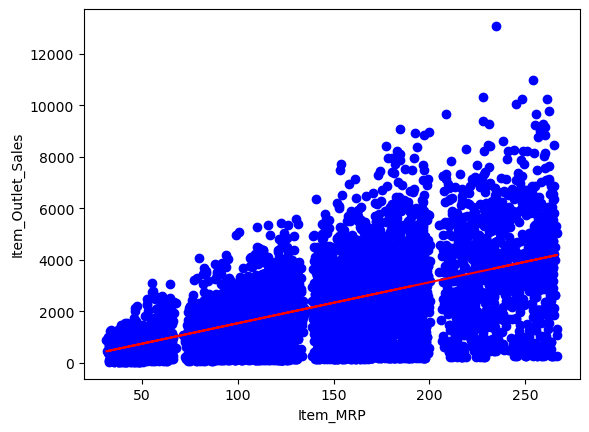

In [125]:
plt.scatter(train_x,train_y,color = 'blue')
plt.plot(train_x,train_predict,color = 'red')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')

In [127]:
residual = train_y - train_predict

In [128]:
residual

,Item_Outlet_Sales
0,-515.001009
1,810.914957
2,61.595596
3,800.439510
4,1122.452728
...,...
5961,936.071907
5962,-947.875012
5963,191.711844
5964,261.413382


<Axes: ylabel='Density'>

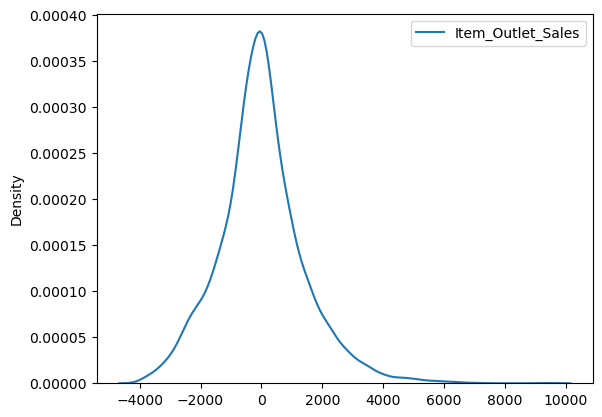

In [129]:
sns.kdeplot(residual)

In [ ]:
# Residual is normally distributed :)

## ERROR METRICS of TRAIN DATA

In [146]:
def Error_Metrics(actual,predicted) :
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    r2 = r2_score(actual,predicted)
    print("mse :",mse,"\nrmse:",rmse,"\nmae",mae,"\nmape",mape,"\nr-score",r2 )
    

    

In [159]:
print("Error Metrics of Train Data:")
Error_Metrics(train_y,train_predict)

Error Metrics of Train Data:
mse : 1992562.607915892 
rmse: 1411.5815980367172 
mae 1039.4572457880895 
mape 1.425438195078662 
r-score 0.3285142086627899


## Testing the Linear Regression Model with Test Data

In [148]:
test_x = test_x.reset_index().drop(columns = 'index')

In [149]:
test_y = test_y.reset_index().drop(columns = 'index')

In [150]:
reg.fit(test_x,test_y)

LinearRegression()

In [151]:
reg.intercept_

array([81.68629919])

In [152]:
reg.coef_

array([[14.76687512]])

In [154]:
test_predict = reg.predict(test_x)

Text(0, 0.5, 'Item_Outlet_Sales')

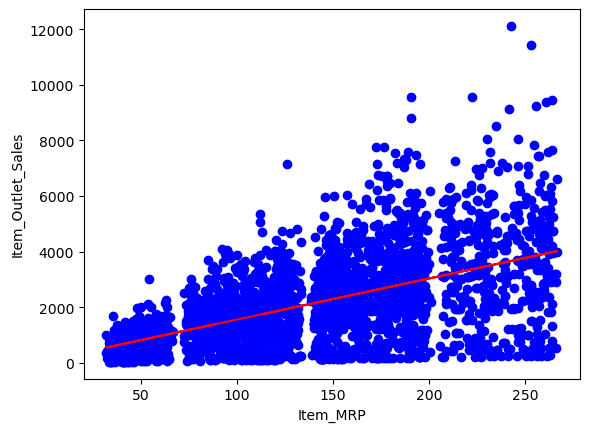

In [155]:
plt.scatter(test_x,test_y,color = 'blue')
plt.plot(test_x,test_predict,color = 'red')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')

In [156]:
residual = test_y -test_predict

<Axes: ylabel='Density'>

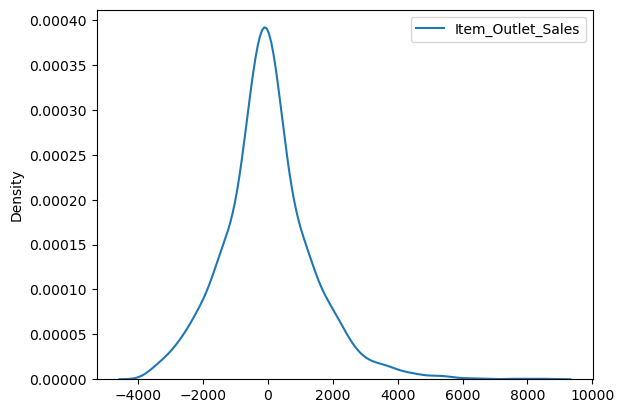

In [158]:
sns.kdeplot(residual)

## ERROR METRICS OF TEST DATA

In [160]:
def Error_Metrics(actual,predicted) :
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    r2 = r2_score(actual,predicted)
    print("mse :",mse,"\nrmse:",rmse,"\nmae",mae,"\nmape",mape,"\nr-score",r2 )

In [161]:
print("Error Metrics of Test Data:")
Error_Metrics(test_y,test_predict)

Error Metrics of Test Data:
mse : 1926179.288446293 
rmse: 1387.8686135388655 
mae 1013.3846356271022 
mape 1.4722281921204061 
r-score 0.30693580354655303


## comparing Error Metris of Train and Test Data for simple Linear Regression

In [ ]:
'''
Error Metrics of Train Data:
mse : 1992562.607915892 
rmse: 1411.5815980367172 
mae 1039.4572457880895 
mape 1.425438195078662 
r-score 0.3285142086627899

--------------------------------------

Error Metrics of Test Data:
mse : 1926179.288446293 
rmse: 1387.8686135388655 
mae 1013.3846356271022 
mape 1.4722281921204061 
r-score 0.30693580354655303
'''

# Multiple Linear Regression For Numerical Data

## Model Expanding : Multiple Linear Regression

In [162]:
x= data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']]

In [163]:
y = data['Item_Outlet_Sales']

In [166]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state = 3434)

In [167]:
reg= LinearRegression()

In [168]:
reg.fit(train_x,train_y)

LinearRegression()

In [169]:
reg.intercept_

15.173525120265822

In [170]:
reg.coef_

array([-1.22014757e+00, -4.03264684e+03,  1.51627621e+01,  1.19184089e+01])

In [172]:
train_predict = reg.predict(train_x)

In [173]:
train_predict

array([1719.20432279, 4241.18018068, 1370.13041741, ..., 3038.06155539,
        729.71823261, 2346.64539327])

In [174]:
residual = train_y - train_predict

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

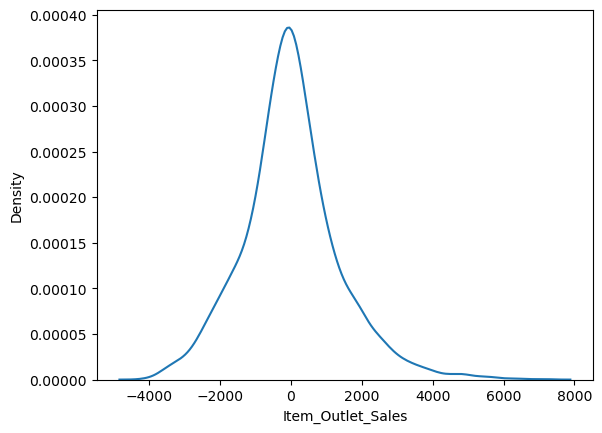

In [175]:
sns.kdeplot(residual)

In [178]:
def Error_Metrics(actual,predicted):
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    rscore = r2_score(actual,predicted)
    print("mse:",mse,"\nrmse:",rmse,"\nmae:",mae,"\nmape:",mape,"\nR-Score:",rscore)

In [179]:
print("Error Metrics Of Train Data")
Error_Metrics(train_y,train_predict)

Error Metrics Of Train Data
mse: 1914551.9844469693 
rmse: 1383.6733662418198 
mae: 1019.3118297543966 
mape: 1.419242421434408 
R-Score: 0.3287959173943753


In [180]:
reg.fit(test_x,test_y)

LinearRegression()

In [181]:
reg.intercept_

-92.27544196478357

In [182]:
reg.coef_

array([-3.67649460e+00, -5.17831812e+03,  1.64640951e+01,  1.45237676e+01])

In [183]:
test_predict = reg.predict(test_x)

In [184]:
residual = train_y - train_predict

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

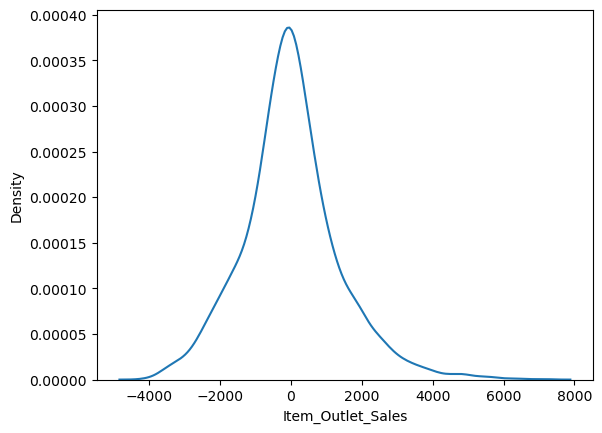

In [185]:
sns.kdeplot(residual)

In [186]:
def Error_Metrics(actual,predicted):
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    rscore = r2_score(actual,predicted)
    print("mse:",mse,"\nrmse:",rmse,"\nmae:",mae,"\nmape:",mape,"\nR-Score:",rscore)

In [187]:
print("Error Metrics Of Test Data")
Error_Metrics(test_y,test_predict)

Error Metrics Of Test Data
mse: 1907935.1123154932 
rmse: 1381.28024394599 
mae: 1029.7007316934141 
mape: 1.3588002441090687 
R-Score: 0.3741077766425014


## comparing Error Metris of Train and Test Data for Multiple Linear Regression

In [ ]:
'''
Error Metrics Of Train Data
mse: 1914551.9844469693 
rmse: 1383.6733662418198 
mae: 1019.3118297543966 
mape: 1.419242421434408 
R-Score: 0.3287959173943753

-------------------------------------------

Error Metrics Of Test Data
mse: 1907935.1123154932 
rmse: 1381.28024394599 
mae: 1029.7007316934141 
mape: 1.3588002441090687 
R-Score: 0.3741077766425014
'''

## One-Hot Encoding for categorical Variables

In [189]:
data_cat = data.select_dtypes(exclude =np.number)

In [190]:
data_cat = pd.get_dummies(data_cat)

In [191]:
data_cat

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8520,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [192]:
data_cat.corr()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Fat_Content_Low Fat,1.000000,-1.000000,-0.083804,-0.032643,-0.065711,-0.073235,-0.021236,-0.085041,-0.116955,0.118461,...,0.002132,-0.004671,0.003079,-0.003155,0.003272,-0.000241,0.002924,-0.000533,-0.002129,-0.000183
Item_Fat_Content_Regular,-1.000000,1.000000,0.083804,0.032643,0.065711,0.073235,0.021236,0.085041,0.116955,-0.118461,...,-0.002132,0.004671,-0.003079,0.003155,-0.003272,0.000241,-0.002924,0.000533,0.002129,0.000183
Item_Type_Baking Goods,-0.083804,0.083804,1.000000,-0.049968,-0.032801,-0.082354,-0.084600,-0.095849,-0.117916,-0.046036,...,0.003036,-0.008819,0.006435,0.003392,-0.000701,-0.002446,0.003536,0.001846,-0.003632,-0.002957
Item_Type_Breads,-0.032643,0.032643,-0.049968,1.000000,-0.019918,-0.050010,-0.051373,-0.058204,-0.071605,-0.027955,...,-0.005442,0.001104,0.002379,-0.005140,0.002933,0.001909,0.002305,-0.006189,-0.000734,0.007693
Item_Type_Breakfast,-0.065711,0.065711,-0.032801,-0.019918,1.000000,-0.032828,-0.033723,-0.038207,-0.047004,-0.018351,...,0.003236,-0.000104,-0.001937,0.005046,-0.008741,0.003754,0.015676,-0.008695,0.000077,-0.003550
Item_Type_Canned,-0.073235,0.073235,-0.082354,-0.050010,-0.032828,1.000000,-0.084670,-0.095929,-0.118015,-0.046074,...,-0.008461,0.004073,0.001469,-0.004766,0.009366,-0.004612,-0.012574,0.001236,0.010418,0.001136
Item_Type_Dairy,-0.021236,0.021236,-0.084600,-0.051373,-0.033723,-0.084670,1.000000,-0.098544,-0.121232,-0.047330,...,0.007514,-0.005060,0.000061,0.013399,-0.008162,-0.004482,0.006933,0.003396,-0.001746,-0.010817
Item_Type_Frozen Foods,-0.085041,0.085041,-0.095849,-0.058204,-0.038207,-0.095929,-0.098544,1.000000,-0.137352,-0.053624,...,-0.002007,-0.005416,0.006388,0.008834,-0.000590,-0.007556,-0.006763,0.009750,-0.001507,-0.006128
Item_Type_Fruits and Vegetables,-0.116955,0.116955,-0.117916,-0.071605,-0.047004,-0.118015,-0.121232,-0.137352,1.000000,-0.065970,...,0.007783,0.006591,-0.011133,-0.006082,-0.002541,0.008032,-0.004556,-0.000811,0.000919,0.005173
Item_Type_Hard Drinks,0.118461,-0.118461,-0.046036,-0.027955,-0.018351,-0.046074,-0.047330,-0.053624,-0.065970,1.000000,...,-0.000964,0.007784,-0.006759,-0.003272,0.003314,-0.000174,-0.007189,0.007837,-0.003132,-0.001143


<Axes: >

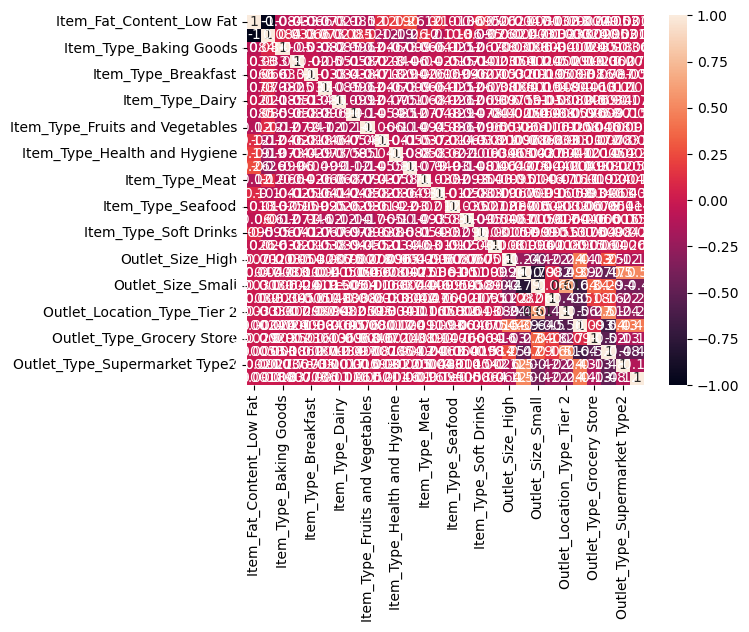

In [194]:
sns.heatmap(data_cat.corr(),annot = True)

In [ ]:
# looks vague :( but let me just try to familiarise the linear regression concept by applying on only categorical data

In [195]:
x= data_cat

In [196]:
y = data['Item_Outlet_Sales']

In [197]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state = 234)

In [198]:
reg = LinearRegression()

In [199]:
reg.fit(train_x,train_y)

LinearRegression()

In [200]:
reg.intercept_

2067.635640081671

In [201]:
reg.coef_

array([  -39.07461296,    39.07461296,  -188.58110194,   -61.05239232,
        -100.31530543,   -11.91902611,    67.14908274,   -55.89396374,
         114.4301943 ,    59.5120307 ,   -64.40671576,   122.62191651,
          50.4775619 ,  -108.97589271,    81.7926011 ,    82.96614205,
        -167.84411799,   180.03898672,   -68.55886811,    60.81181509,
           7.74705302,    -2.65247313,    13.33430598,   -10.68183285,
       -1729.0454212 ,   245.17522134,  -116.28379586,  1600.15399572])

In [203]:
train_predict = reg.predict(train_x)

In [204]:
residual = train_y-train_predict

In [214]:
def Error_Metrics(actual,predicted):
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    rscore = r2_score(actual,predicted)
    print("mse:",mse,"\nrmse:",rmse,"\nmae:",mae,"\nmape:",mape,"\nR-Score:",rscore)

In [215]:
print("Error Metrics Of Train Data")
Error_Metrics(train_y,train_predict)

Error Metrics Of Train Data
mse: 2197067.401500063 
rmse: 1482.2507890030158 
mae: 1113.3877002892657 
mape: 1.0295283343658324 
R-Score: 0.24931334967222507


In [206]:
reg.fit(test_x,test_y)

LinearRegression()

In [207]:
reg.intercept_

2144.452747717656

In [208]:
reg.coef_

array([    6.95409808,    -6.95409808,  -298.6263503 ,   209.98299516,
         267.13300842,    92.24593764,   131.27899279,   -42.28095842,
          43.1751352 ,  -244.5248804 ,  -359.5523613 ,    86.89029896,
        -119.87852126,  -173.65381443,   459.32804043,    76.71269959,
        -146.87390465,    18.64368256,   138.09202898,   -27.89571798,
        -110.196311  ,   -37.79943503,    66.87270735,   -29.07327232,
       -1651.68906425,   200.82667915,  -109.19406939,  1560.05645449])

In [211]:
test_predict = reg.predict(test_x)

In [212]:
residual = test_y - test_predict

In [213]:
def Error_Metrics(actual,predicted):
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    rscore = r2_score(actual,predicted)
    print("mse:",mse,"\nrmse:",rmse,"\nmae:",mae,"\nmape:",mape,"\nR-Score:",rscore)

In [216]:
print("Error Metrics Of Test Data")
Error_Metrics(test_y,test_predict)

Error Metrics Of Test Data
mse: 2192538.891041972 
rmse: 1480.7224220095986 
mae: 1112.879256770414 
mape: 1.0279549647033848 
R-Score: 0.23785045909559321


## Combined Multiple Regression with Continuos and One - Hot Encoded Categorial Data

In [218]:
data_num = data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']]

In [219]:
data_cat

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8520,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [220]:
data_new = pd.concat([data_num,data_cat],axis = 1)

In [221]:
data_new

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,24,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,14,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,24,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,25,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,36,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,36,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,21,0,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,19,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,14,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [222]:
x= data_new

In [223]:
y = data['Item_Outlet_Sales']

In [226]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state = 4543)

In [227]:
reg.fit(train_x,train_y)

LinearRegression()

In [228]:
reg.intercept_

791.1147953112018

In [229]:
reg.coef_

array([    4.2769392 ,  -537.42762083,    15.32205307,   -23.77256555,
         -21.63760838,    21.63760838,    -9.47534588,    54.70838723,
         -49.43019978,    56.75897995,  -102.94263679,   -21.87563541,
          12.57344741,   -16.20017565,     9.99604869,   -32.2135616 ,
          63.8379751 ,   -45.82571409,    54.30135858,   -19.57442246,
          55.48608238,   -10.12458767,   403.60022914,  -177.73490931,
        -225.86531983,   156.10530841,    28.15042189,  -184.25573029,
       -1594.51111554,   -21.99942214,  -357.05066954,  1973.56120722])

In [230]:
train_predict = reg.predict(train_x)

In [231]:
residual = train_y - train_predict

In [232]:
def Error_Metrics(actual,predicted):
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    rscore = r2_score(actual,predicted)
    print("mse:",mse,"\nrmse:",rmse,"\nmae:",mae,"\nmape:",mape,"\nR-Score:",rscore)

In [233]:
print("Error Metrics Of Train Data")
Error_Metrics(train_y,train_predict)

Error Metrics Of Train Data
mse: 1240364.674993927 
rmse: 1113.7166044348655 
mae: 826.0078239247068 
mape: 1.0385176717239597 
R-Score: 0.565116344766774


In [234]:
reg.fit(test_x,test_y)

LinearRegression()

In [235]:
reg.intercept_

1707.3232503383

In [236]:
reg.coef_

array([  -11.76200672,   326.892179  ,    16.16189662,   -45.29012404,
         -24.73821808,    24.73821808,    -8.88887224,  -139.52545235,
          78.54172752,   -82.34711399,    72.16210907,   -90.35699289,
          35.14814365,    -4.68106467,   -97.82744912,   -87.07488204,
        -209.01529413,     9.42215524,   714.61786789,   -40.25171362,
        -267.00934562,   117.08617729,   666.43935635,  -322.77555275,
        -343.6638036 ,   271.71167677,    25.24816133,  -296.9598381 ,
       -1690.37895293,  -269.30287244,  -393.19130334,  2352.87312871])

In [237]:
test_predict = reg.predict(test_x)

In [238]:
residual = test_y - test_predict

In [239]:
def Error_Metrics(actual,predicted):
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    rscore = r2_score(actual,predicted)
    print("mse:",mse,"\nrmse:",rmse,"\nmae:",mae,"\nmape:",mape,"\nR-Score:",rscore)

In [240]:
print("Error Metrics Of Test Data")
Error_Metrics(test_y,test_predict)

Error Metrics Of Test Data
mse: 1319399.5919776845 
rmse: 1148.6512055352941 
mae: 854.164600538708 
mape: 1.0210397880623125 
R-Score: 0.5667314163422079


## comparing Error Metris of Train and Test Data for Multiple Linear Regression (Num + Cat)

In [ ]:
'''
Error Metrics Of Train Data
mse: 1240364.674993927 
rmse: 1113.7166044348655 
mae: 826.0078239247068 
mape: 1.0385176717239597 
R-Score: 0.565116344766774
-------------------------------------
Error Metrics Of Test Data
mse: 1319399.5919776845 
rmse: 1148.6512055352941 
mae: 854.164600538708 
mape: 1.0210397880623125 
R-Score: 0.5667314163422079

'''

In [ ]:
# Please complete this

In [ ]:
1. Drop the Item identifier
2. convert all other categorical data to one hot
3. concat the numerical data and one hoted categorical data
4. split train and test
5. build the model on train
6. predict the train
7. find the train error
8. predict on test
9. find the test error
10. compare the train and test error

In [ ]:
# Completed !!!